<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек,-загрузка-данных" data-toc-modified-id="Импорт-библиотек,-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек, загрузка данных</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Графики</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

### Импорт библиотек, загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import math

import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
display(query_1, query_1.info(), query_3, query_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


None

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


None

У нас в распоряжении есть 2 таблицы query_1  и query_3,  пропуски отсутствуют, типы данных представленны корректно 

### Графики 

In [3]:
top_10 = query_3.sort_values(by= 'average_flights',ascending=False).head(10).reset_index(drop=True)
top_10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Text(0.5, 0.98, 'Количество рейсов по моделям самолетов')

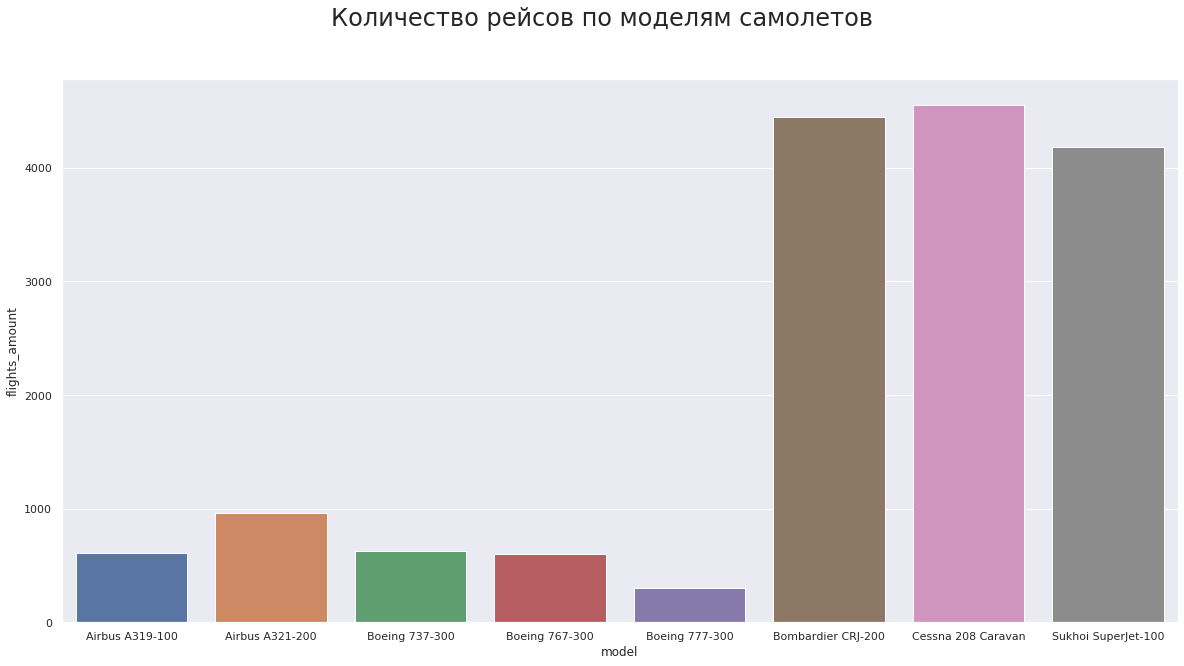

In [4]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.barplot(data= query_1, x= "model", y="flights_amount").figure.suptitle("Количество рейсов по моделям самолетов", fontsize = 24)


ИЗ графика видно, что количество рейсов малогабаритных среднедистанционных(у этих самолетов макс дистанция 2500 км)  самолетов(Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100) превышает 4000,у остальных количество перелетов не превышает 1000 

разница формируется, в счет того, что все остальные самолеты расчитаны на дальние перевозки, таких перелетов совершается гараздо меньше, а эксплуатировать такие самолеты на малых дистанциях дороже

Text(0.5, 0.98, 'Количество рейсов по городам')

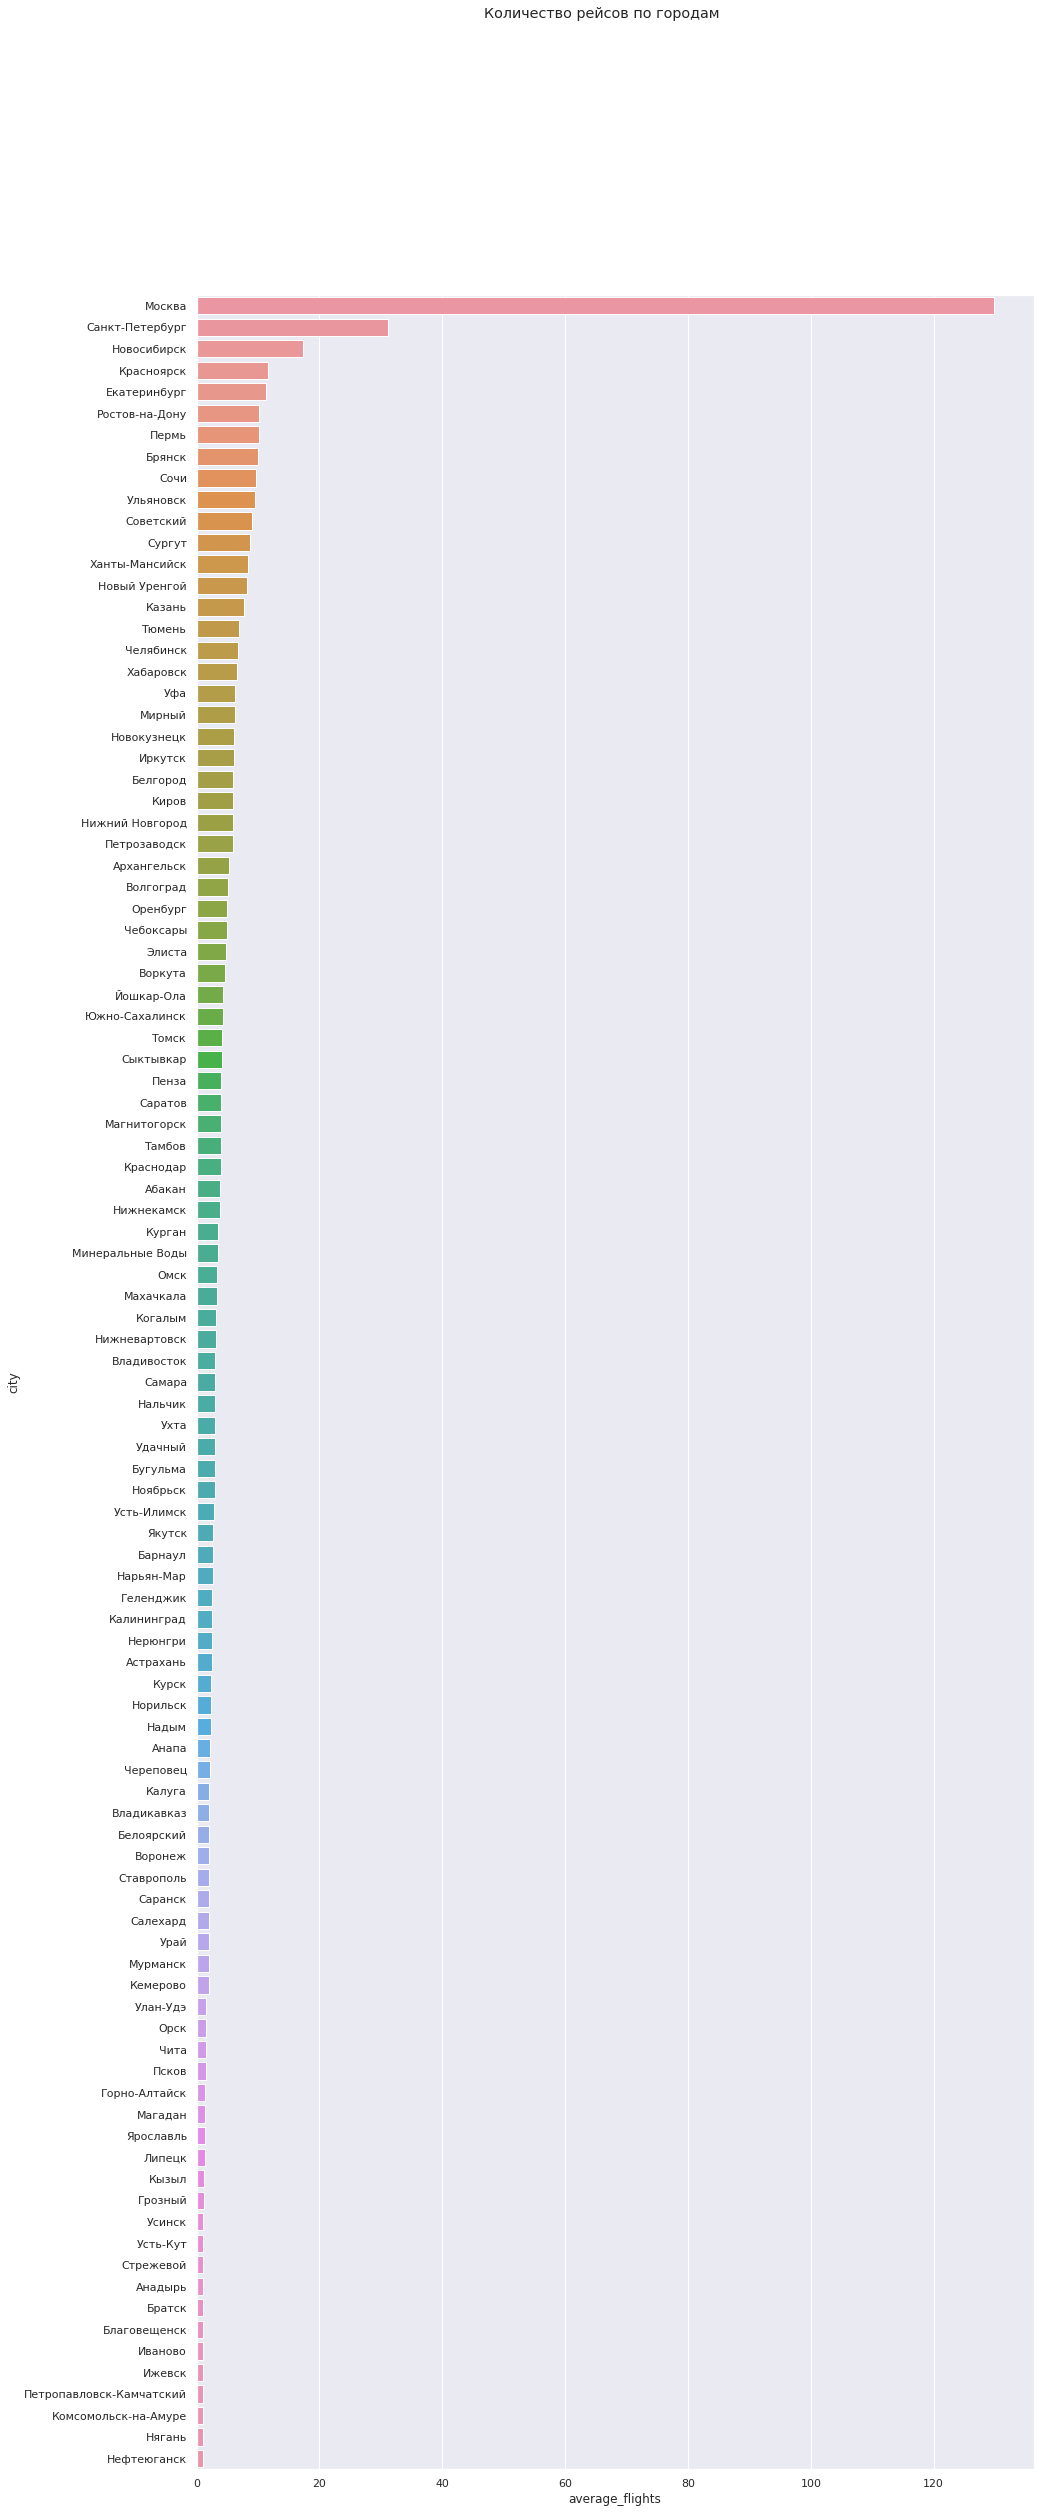

In [5]:
sns.set(rc={'figure.figsize':(15, 40)})
sns.barplot(data= query_3.sort_values(by= 'average_flights',ascending=False), y= "city", x="average_flights").figure.suptitle("Количество рейсов по городам")

На графике видно, что Москва , Санк-Петербург и Новосибирск имеют большее количество перлетов, это связанно, с тем что эти города имеют большие транспортные узлы

Text(0.5, 0.98, 'Количество рейсов по топ 10 городам')

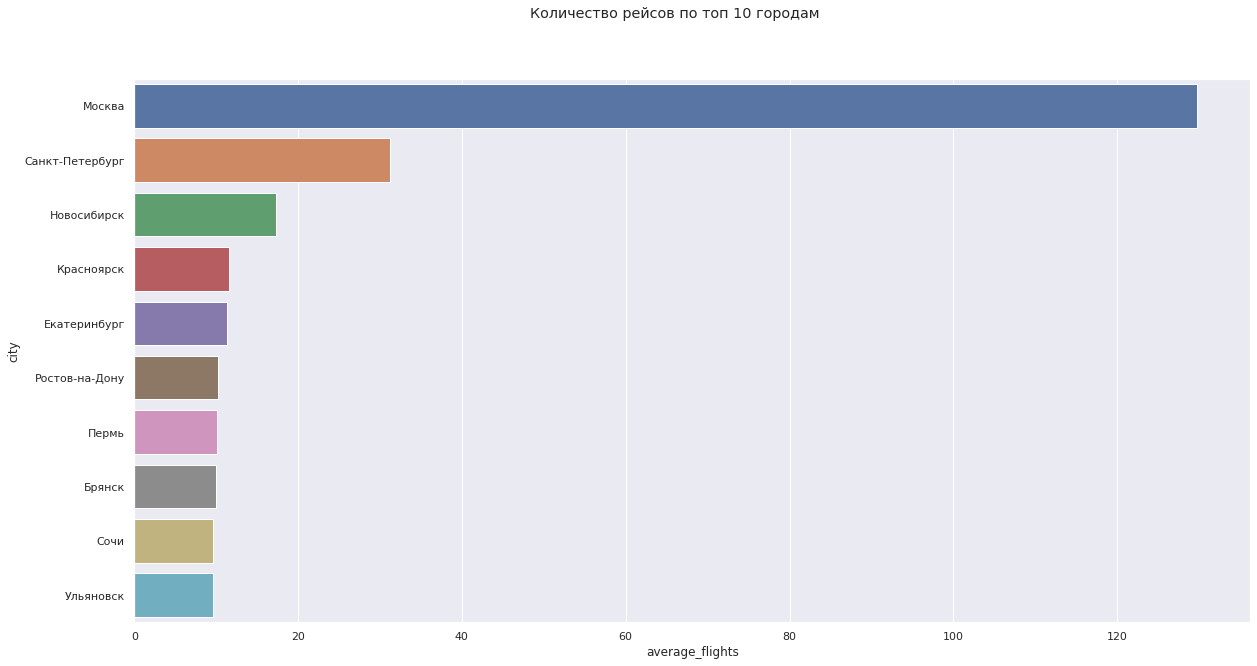

In [6]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.barplot(data= top_10, y= "city", x="average_flights").figure.suptitle("Количество рейсов по топ 10 городам")

На графике видно, что Москва значительно, опережает другие города по количеству перелетов, связанно с бОльшим количеством аэропортов, и международными превозками, многие делают пересадкув москве дабы улететь в другую страну

### Общий вывод


- Самые часто испоьзуемые самолеты, это средене дистанционные модели типа Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100
- Топ 3 городов по количеству рейсов это Москва , Санк-Петербург и Новосибирск
- Самое большое количество авиапервозок совершается в Москве